# Experimental calibration

**Author**: Jesús del Hoyo

**Date**:   30/09/2021

**Motivation**: Teluro project, polariscope callibration

**Objective**:

Este archivo debe servir para realizar una calibración completa del polarimetro para medidas masivas. Se colocará el polarímetro en configuración para medir muestras masivas (fotodiodos, no cámara). En primer lugar, se calibrarán los elementos en la modalidad de transmisión, introduciéndolos uno a uno. Una vez que el polarímetro esté completamente caracterizado en transmisión, opcionalmente podrán medirse el resto de elementos que se deben colocar en el camino del haz para trabajar en reflexión, como un espejo, un beam splitter o el objetivo de microscopio necesario para trabajar en configuración de resolución espacial.

A continuación se describen los elementos de cada parte del polarímetro. Estos elementos pueden cambiar con el tiempo, pero el proceso de calibración es casi el mismo. La única excepción es en caso de que se incluya una fuente con longitud de onda variable. En ese caso, será necesaria una calibración para cada longitud de onda.

**Iluminación**:
1. Diodo láser de Roithner S85500MG de longitud de onda $\lambda$=850 nm.
1. Lente colimadora de Thorlabs DG10-600-B.
1. Polarizador LPNIRE100-B (P0)
1. Retardador WPQ10E-850-SP (R0)
1. Lente divergente de focal -XX cm.

**Brazo de referencia**
1. Beam sampler.
1. Lente ~20 cm de focal.
1. Photodiode PDA100A-EC de Thorlabs (PHD0)

**Generador de estados**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).

**Analizador de estados**
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

**Detector**
1. Dos lentes ~20 cm de focal.
1. Photodiode PDA100A-EC de Thorlabs (PHD1)

**Método de calibración**
La calibración se realiza siempre empezando con el número mínimo de elementos, y añadiéndolos poco a poco para reducir los errores cometidos. Se recomienda dejar calentar la fuente al menos 30 minutos para estabilizarla en temperatura. El método se describe en las secciones subsiguientes.

In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
# %matplotlib widget

In [2]:
import numpy as np
import datetime

from py_lab.setups.polarimeter import Polarimeter, degrees
import py_lab.setups.polarimeter_calibration as cal
from py_lab.config import CONF_DT_50, CONF_U6

number of processors: 4
total memory        : 7.9 Gb
available memory    : 50 %
max frequency       : 3401 GHz


# Stage 1: Experiments

The calibration is divided in two stages. During the first one, we perform all the experiments before starting the data fitting.

## Parameters

Here we set all the parameters we are going to use for the analysis, including paths and filenames. We store all of them in a dictionary.

In [5]:
cal_dict = cal.generate_initial_cal_dict(method="fixed", experiment=True)

In [ ]:
# # Experiment parameters
# cal_dict["type"] = 'Experiment'
# cal_dict["N_measures_1D"] = 91
# cal_dict["N_measures_2D"] = [19, 19]
# # cal_dict["N_measures_2D_step_4b"] = [37, 37]
# cal_dict["N_measures_pol"] = 200
# cal_dict["max_angle_1D"] = 180
# cal_dict["max_angle_2D"] = 180
# cal_dict["step_5a"] = "all"
# cal_dict["step_5b"] = "all"
# # Fit parameters
# cal_dict["NmaxIt"] = 20
# # Initial values
# cal_dict["illum_pol_degree"] = 1
# cal_dict["illum_az"] = 0*degrees
# cal_dict["illum_el"] = 45*degrees
# cal_dict["illum_el_max"] = 45*degrees
# cal_dict["P1_p1"] = 0.95
# cal_dict["P1_p2"] = 0.05
# cal_dict["P1_az"] = 90*degrees
# cal_dict["P1_az_temp"] = 90*degrees
# cal_dict["P1_az_step_4a"] = np.nan
# cal_dict["P1_R"] = 90*degrees
# cal_dict["P2_p1"] = 0.95
# cal_dict["P2_p2"] = 0.05
# cal_dict["P2_az"] = 90*degrees
# cal_dict["P3_p1"] = 0.95
# cal_dict["P3_p2"] = 0.05
# cal_dict["P3_az"] = 90*degrees
# cal_dict["Pc_p1"] = 0.95
# cal_dict["Pc_p2"] = 0.05
# cal_dict["R1_p1"] = 0.98
# cal_dict["R1_p2"] = 0.98
# cal_dict["R1_az"] = 90*degrees
# cal_dict["R1_az_temp"] = 90*degrees
# cal_dict["R1_R"] = 83*degrees
# cal_dict["R2_p1"] = 0.98
# cal_dict["R2_p2"] = 0.98
# cal_dict["R2_az"] = 90*degrees
# cal_dict["R2_R"] = 83*degrees
# cal_dict["Rc_p1"] = 0.98
# cal_dict["Rc_p2"] = 0.98
# cal_dict["Rc_R"] = 43*degrees
# cal_dict["Rc_offset"] = 0*degrees
# cal_dict["Rc_offset_max"] = 10*degrees

# # Derived parameters
# cal_dict["angles_1"] = np.linspace(0,cal_dict["max_angle_1D"],cal_dict["N_measures_1D"])
# cal_dict["angles_2X"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][1])
# cal_dict["angles_2Y"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D"][0])
# # cal_dict["angles_2X_step_4b"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D_step_4b"][1])
# # cal_dict["angles_2Y_step_4b"] = np.linspace(0,cal_dict["max_angle_2D"],cal_dict["N_measures_2D_step_4b"][0])

### Folder to save data

In [7]:
%cd D:\Experimentos\Calibracion\Pol_Cal_22_05_10_Con_Lente

[WinError 2] El sistema no puede encontrar el archivo especificado: 'D:\\Experimentos\\Calibracion\\Pol_Cal_22_05_10_Con_Lente'
D:\Software\py_lab\py_lab\setups\Polarimeter Notebooks


## Step 0: Preparations

These steps are necessary to perform the calibration, but no 1D, 2D or polarimetry measurement is performed.

### Step 0a: Initialization

We start by initializing card and motors.

In [8]:
pol = Polarimeter(calibration=None)
pol.Open()

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

DLL loaded succesfully!
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0



Check thatrotation orientation is correct for all motors.

In [ ]:
pol.motor.Move_Relative(dist=360*np.ones(4), move_time=15)

array([360.   , 360.   , 360.994, 727.276])

In [10]:
pol.motor.Move_Absolute(pos=360*np.ones(4), move_time=20)

array([360., 360., 360., 360.])

In [11]:
pol.motor.Home()

### Step 0b: Align detectors

The analyzer arm is usually moved. First, we have to place it so we have the polarimeter in transmission configuration. Then, we must turn on the diode and, after waiting a bit so the intensity is stable over time, the detectors must be placed so the signal is maximum for both of them.

### Step 0c: Photodetector background
 
We have to measure and record the signal measured by the photodetectors with the diode offline. The experiment should be as covered as possible to avoid light from unknown sources. Also, lab lights must be off.

In [12]:
# Apagar diodo
pol.daca.Get_Signal(is_background=True, verbose=True)

In [14]:
pol.Ready()

In [22]:
# Test medidas absolutas
pol.daca.Get_Signal(use_ref=False, rest_background=False, verbose=True, return_ref=True)

Reference:  8.343351853265
Signal:  4.452071983550001


(4.452071983550001, 8.343351853265)

### Step 0d: Align polarizer 0 (P0)

P0 must be placed at the output of the laser diode. The diode shoud emmit linear light, but we use P0 as caution. The alignment is performed manually, so the researcher should do it looking at the osciloscope.

### Step 0e: Align retarder 0 (R0)

After placing P0, retarder 0 must be aligned to obtain circularly polarized light. The easiest way of aligning it is placing a second polarizer after the position where R0 will be placed. Then, the second polarizer is rotated until light is minimal. Then, R0 is placed and rotated until output light is maximum.  

Then, we have to check the result obtained. The manual polarizer is removed and P1 is placed at Motor 3. Then, P1 is rotated upon 360º to check the circularity of the light. Ideally, the curve must be flat. However, if the retardance of Q0 is not exactly 90º or the output of P0 is not perfectly inearly polarized, the output light will be elliptical. Also, P0 and Q0 may present some deffects that will destroy the simmetry it must present between the first and the last 180º.

In [27]:
# Parameters
num_data = 91             # Number of points. More points means higher accuracy, but also longer time to make the measurement
max_angle = 360*degrees    # Maximum angle we turn the polarizer
motor_num = 3              # Motor with the polarizer

cal.make_step_0e(pol, num_data=num_data, max_angle=max_angle, motor_num=motor_num)


Completion:   0  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95 100 %
105 %

TypeError: model_step_0e() missing 1 required positional argument: 'angle'

2022-05-10 11:23:41,691 - instrumental.drivers - INFO - Program is exiting, closing all instruments...
2022-05-10 11:23:41,693 - instrumental.drivers - INFO - Done closing instruments
2022-05-10 11:23:41,694 - instrumental.drivers - INFO - Doing driver module-level cleanup...


### Step 0f: Photodetector stability

We will measure the average intensity of signal and reference channels over time. With it, we can calculate averages and later we will be able to correct the small deviations and reduce errors.

**NOTE:** Change in version 2.1. In order to have maximum sensitivity with the signal photodiode, we have to use a neutral density filter. We will caltulate the transmission of the filter before the stability experiment to calculate the true S0.

In [76]:
cal_dict['P_no_filter'] = 33.01  # mW
cal_dict['P_filter'] = 12.97 # mW


Completion:   0   0   1   1   1   2   2   2   3   3   3   4   4   4   5   5   5   6   6   6   7   7   7   8   8   8   9   9   9  10  10  10  11  11  11  12  12  12  13  13  13  14  14  14  15  15  15  16  16  16  17  17  17  18  18  18  19  19  19  20  20  20  21  21  21  22  22  22  23  23  23  24  24  24  25  25  25  26  26  26  27  27  27  28  28  28  28  29  29  30  30  30  31  31  31  32  32  32  33  33  33  34  34  34  35  35  35  36  36  36  37  37  37  38  38  38  39  39  39  40  40  40  41  41  41  42  42  42  43  43  43  44  44  44  45  45  45  46  46  46  47  47  47  48  48  48  49  49  49  50  50  50  51  51  51  52  52  52  53  53  53  54  54  54  55  55  55  56  56  56  56  57  57  57  58  58  59  59  59  60  60  60  61  61  61  62  62  62  63  63  63  64  64  64  65  65  65  66  66  66  67  67  67  68  68  68  69  69  69  70  70  70  71  71  71  72  72  72  73  73  73  74  74  74  75  75  75  76  76  76  77  77  77  78  78  78  79  79  79  80  80  80  81  81  81  82  82

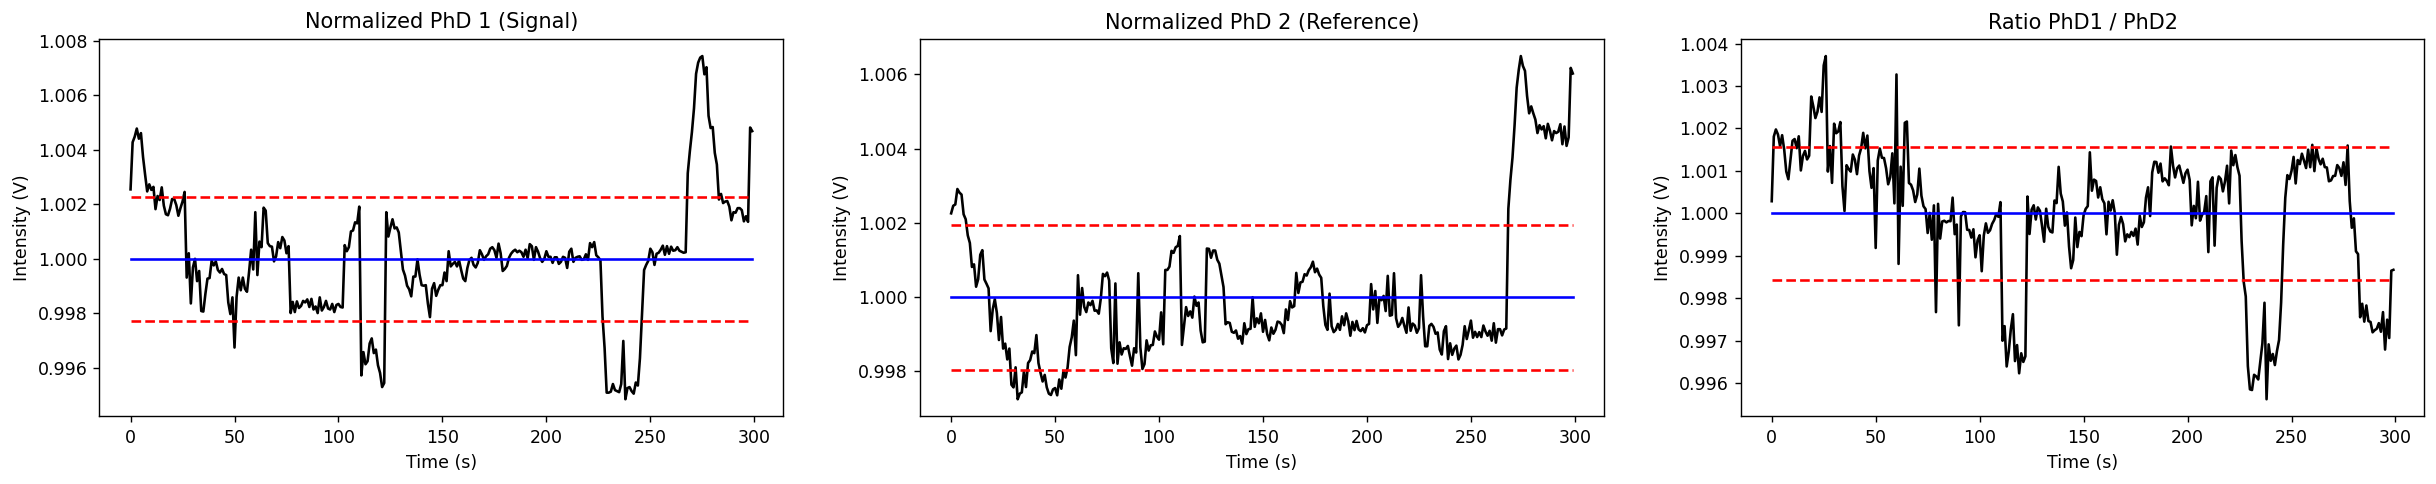

In [77]:
cal_dict["Nmeasurements"] = 300    # Number of measurements
cal_dict["Twait"] = 0.5              # Waiting time between measurements in seconds
cal_dict['S0'], cal_dict['S0_error'] = cal.make_step_0f(pol, cal_dict)

Now we measure manually the transmission of the neutral filter to correct S0.

## Step 1: Reference angle of P1

In this step we perform the Malus Law experiment with P1 (placed in motor 3) and a polarizer with known optical axes (PREF) , which will be our absolute angle reference. The neutral filter must be removed.


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 %

2022-02-15 13:34:58,278 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


100 %


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|150/150, best_cost=0.0155
2022-02-15 13:35:15,098 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.015478077489136497, best pos: [0.94441242 0.07305325 2.69531937]


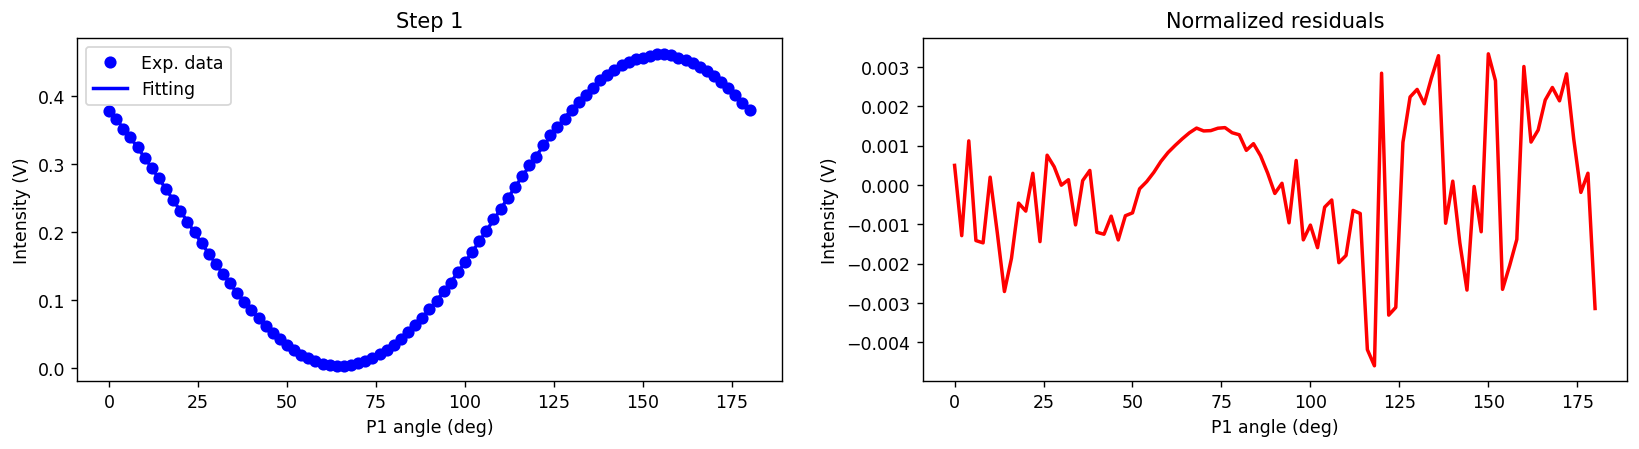

The normalized MSE is: 0.02 %.

Preliminarr analysis first iteration:
   - Pref p1       : 0.944
   - Pref p2       : 0.056
   - P1 theta_0    : 154.7 deg
   - Max Intensity : 0.463 a.u.


In [78]:
cal_dict = cal.make_step_1(cal_dict, pol, verbose=True)

## Step 2: Characterization of the illumination

During this step, the illumination will be characterized. This step is divided in two. 

**NOTE:** This step has changed between verion 1.2 (old *polaripython* module) and this version. Previously, it was not possible to correctly determine the source ellipticity angle sign (negative ellipticity was translated into positive ellipticity and azimuth + 90º). Right now, it should be possible.

### Step 2a: Azimuth of illumination

If the illumination is not perfectly circular (i.e., it is elliptical), here we will measure the azimuth of the illumination. We will also measure a value for ellipticity angle. However, that value is the maximum possible, depolarization will be masked as circular polarization here. Also, the sign of the ellipticity angle can't be measured here.

The reference polarizer must be removed. Then, P1 will be rotated.


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 %

2022-02-15 13:38:21,187 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


100 %


pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████|150/150, best_cost=0.0867
2022-02-15 13:38:34,571 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.08669083388985226, best pos: [1.22986708 0.7413339 ]


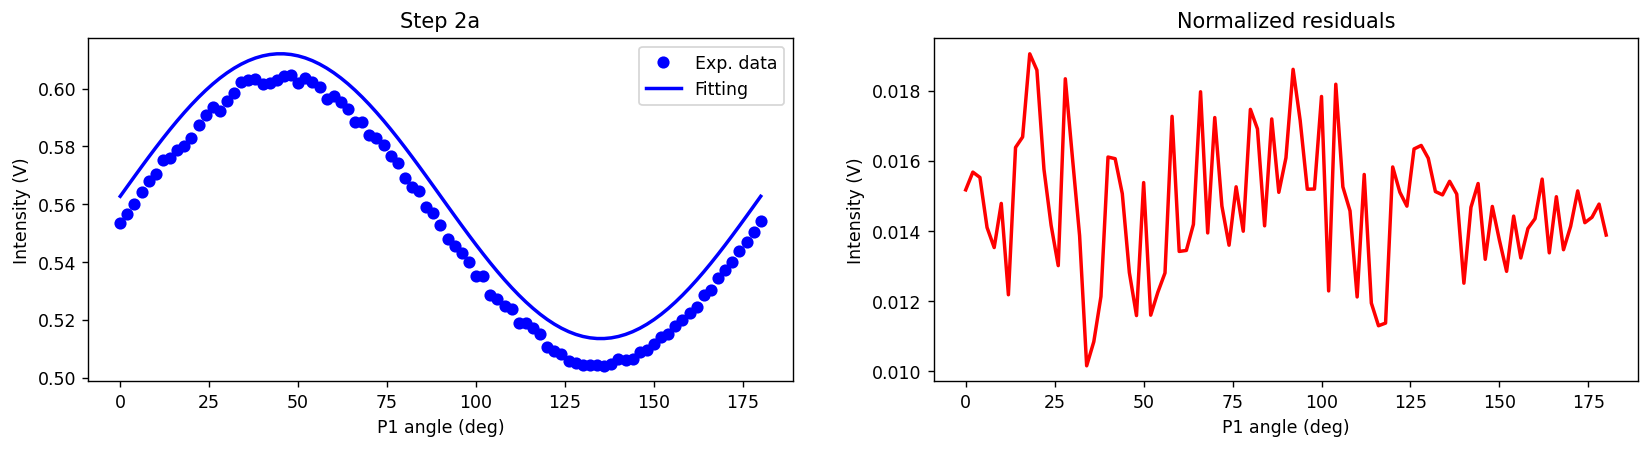

The normalized MSE is: 0.16 %.

Preliminarr analysis first iteration:
   - Illumination azimuth       : 70.4 deg
   - Max. illum. ellipticity    : 42.5 deg
   - Max Intensity : 0.605 a.u.


In [79]:
# reload(cal)
cal_dict = cal.make_step_2a(cal_dict, pol, verbose=True)

### Step 2b: Other illumination parameters

Now we will repeat the previous step introducing a retarder with known fast axis (Rc). If Rc is not callibrated, we have a problem: if Rc retardance is unknown, illumination depolarization and Rc retardance will produce the same effect in the intensity curve, so both of them cannot be found at the same time. Rc will also be charactericed in step 4, so the depolarization of the source can be partially adressed. However, the error may be high. Anywaw, depolarization from the source should be small and it will have a minor impact in the rest of the experiment. For that reason, we will suppose that the illumination is totally polarized.

RC must be introduced with 45º azimuth. However, as it is impossible to have the same origin as Pc, we will introduce the possibility of a small difference (up to +- 10º) in the fit to adress it.

**NOTE:** Change in version 2.1. The neutral density filter is again required here.


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 %

2022-02-15 13:41:42,080 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


100 %


pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████|150/150, best_cost=3.13
2022-02-15 13:41:59,284 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.1285980590322873, best pos: [0.34070729 0.14439852]
2022-02-15 13:41:59,354 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████|150/150, best_cost=3.35
2022-02-15 13:42:16,485 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.3544273989219033, best pos: [0.0029538  0.12233823]


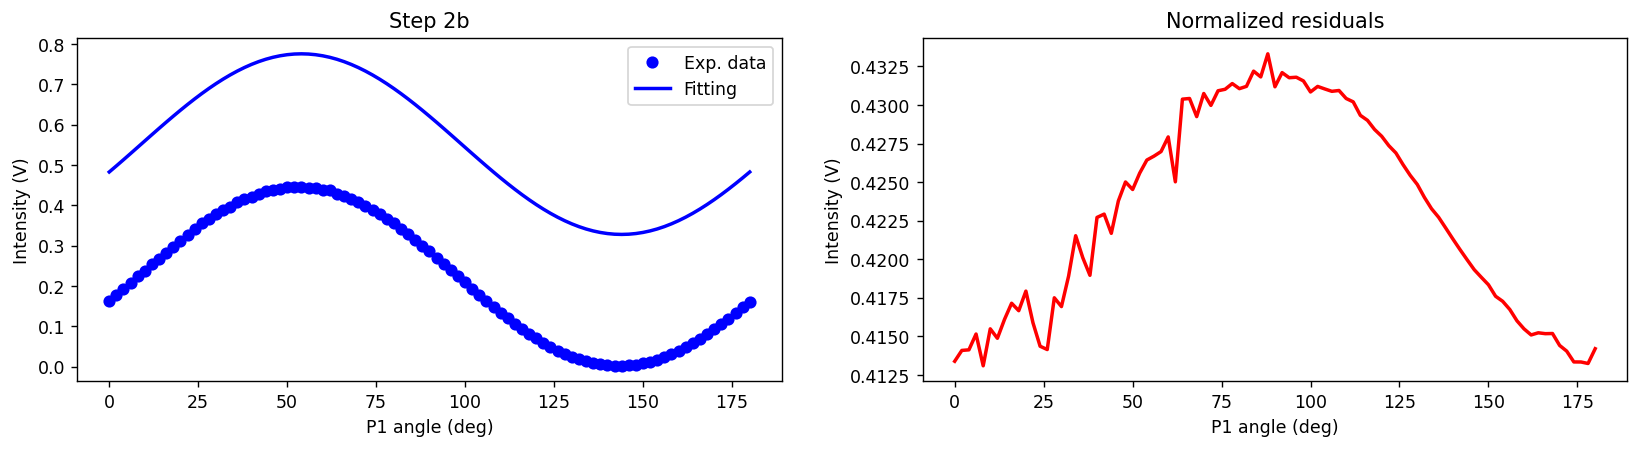

The normalized MSE is: 4.43 %.

Preliminarr analysis first iteration:
   - Rc retardance              : 19.4 deg
   - Rc offset                  : 8.3 deg
   - Illum. ellipticity sign    : 1
   - Max Intensity : 0.445 a.u.


In [80]:
cal_dict = cal.make_step_2b(cal_dict, pol, verbose=True)

##  Step 3: Calibrate the polarizers

At this step we calibrate the polarizers of the polarimeter. If we assume that both of them can be different (and the probably are, even slightly, due to fabrication tolerances) we need to use three different ones. We will perform the Malus Law experiment with three sets of two polarizers, using each one twice. In this way, we will be able to measure p1 and p2 for the three of them.

Sadly, there are two parameters that we can't measure about the polarizers. The first one is the retardance they introduce. As the intensity of the low transmission state is almost negligible, it shouldn't impact much on latter experiments, but we will see that it is a fine tuning that allows improving precission. It will be measured in the next step. The second parameter we can't measure is the ellipticity of the polarizers eigenstates. We will have to suppose that they are 0. This is a good assumption due to how the polarizers are made.

#### Step 3a

Remove Rref and neutral filter and use P3 (motor 0) and P1 (motor 3).


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


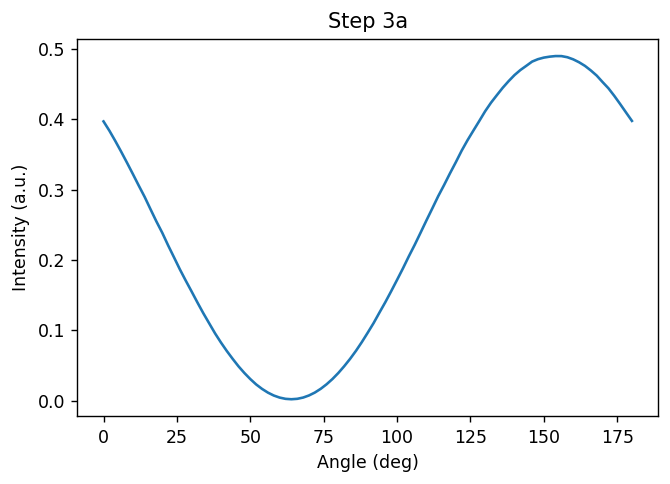

In [81]:
cal_dict = cal.make_step_3(cal_dict, pol, substep='a', verbose=True)

#### Step 3b

P3 (motor 0) and P2 (motor 3).


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


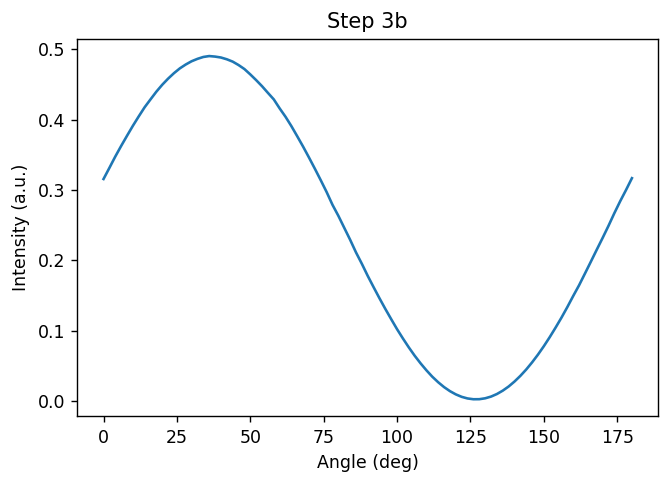

In [82]:
cal_dict = cal.make_step_3(cal_dict, pol, substep='b', verbose=True)

#### Step 3c

P1 (motor 0) and P2 (motor 3).


Completion:   0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20  21  23  24  25  26  27  28  29  30  31  32  34  35  36  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64  65  67  68  69  70  71  72  73  74  75  76  78  79  80  81  82  83  84  85  86  87  89  90  91  92  93  94  95  96  97  98 100 %


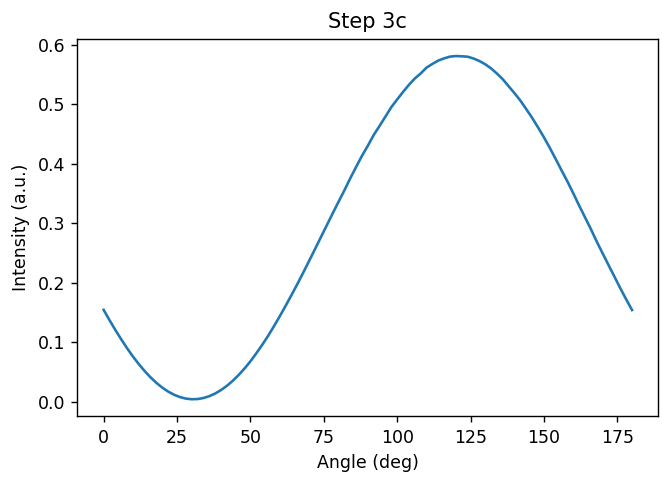

In [83]:
cal_dict = cal.make_step_3(cal_dict, pol, substep='c', verbose=True)

### Preliminary analysis of Step 3

Just to check how good are we on the analysis.

2022-02-15 16:16:27,703 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|150/150, best_cost=0.341
2022-02-15 16:17:25,390 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3406728080312219, best pos: [0.97445187 0.03672927 0.98343975 0.06815372 0.93382872 0.05263975
 1.60211577 0.5368748  3.09083458]


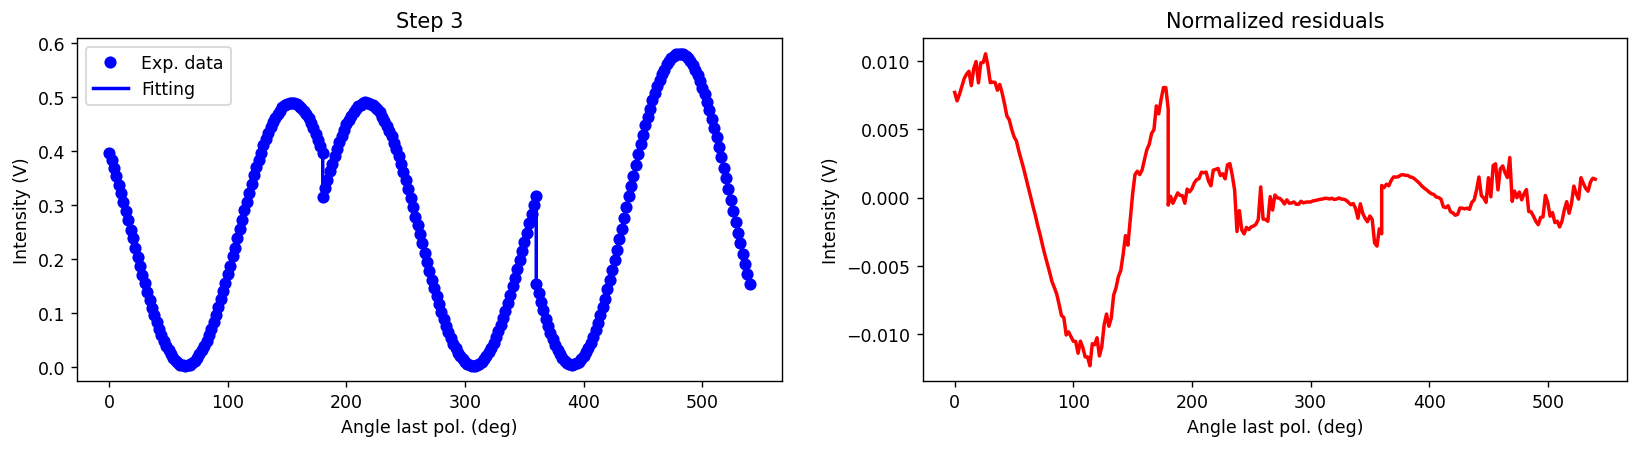

The normalized MSE is: 0.03 %.

Preliminary analysis:
   - P1 p1         : 0.971
   - P1 p2         : 0.067
   - P1 theta_0    : 96.0 deg
   - P2 p1         : 0.971
   - P2 p2         : 0.068
   - P2 theta_0    : 36.8 deg
   - P3 p1         : 0.960
   - P3 p2         : 0.000
   - P3 theta_0    : 180.0 deg


In [84]:
cal_dict = cal.analysis_step_3(cal_dict, verbose=True)

## Step 4: Characterization of R2

Now, R2 will be characterized. It will be also possible to characterize the retardance of P1.

### Step 4a: Reference angle of R2

Measuring the initial angle of R2 may be tricky. If we rotate R2 between two polarizers, we obtain two angles: $\theta$ and $\theta+90\deg$. In order to discriminate between them, a quarter aveplate with known axis must be used. However, the uncertainty in the angle of P1 increases the difficulty.

**NOTE:** New in version 2.2. Before, P1 was rotated to a "known" position of 0º. However, that position was taken for the previous fit of step 3. In order to remove any dependence on previous fits, which may be wrong, we will modify this step. Instead, wei will change a 1D measurement into a 2D measurement. Then, all the information will be processed at the same time.

Now we place R2 in Motor 2, and Rc between P1 and R2. It is important that P1 and Rc produce the highest possible ellipticity. For that reason, P1 will be rotated to have azimuth ~0º. As the preliminary fits won't have the most exact value it may be slightly different, but the exact used angle will be stored.

In [85]:
cal_dict = cal.make_step_4a(cal_dict, pol, verbose=True)


Completion:   0   0   0   0   1   1   1   1   2   2   2   3   3   3   3   4   4   4   4   5   5   5   6   6   6   6   7   7   7   8   8   8   8   9   9   9   9  10  10  10  11  11  11  11  12  12  12  13  13  13  13  14  14  14  14  15  15  15  16  16  16  16  17  17  17  18  18  18  18  19  19  19  19  20  20  20  21  21  21  21  22  22  22  22  23  23  23  24  24  24  24  25  25  25  26  26  26  26  27  27  27  27  28  28  28  29  29  29  29  30  30  30  31  31  31  31  32  32  32  32  33  33  33  34  34  34  34  35  35  35  36  36  36  36  37  37  37  37  38  38  38  39  39  39  39  40  40  40  40  41  41  41  42  42  42  42  43  43  43  44  44  44  44  45  45  45  45  46  46  46  47  47  47  47  48  48  48  49  49  49  49  50  50  50  50  51  51  51  52  52  52  52  53  53  53  54  54  54  54  55  55  55  55  56  56  56  57  57  57  57  58  58  58  59  59  59  59  60  60  60  60  61  61  61  62  62  62  62  63  63  63  63  64  64  64  65  65  65  65  66  66  66  67  67  67  67  68

### Step 4b: Calibration of R2

Now we calibrate R2, along with the retardance of P1. Rc must be romoved before starting to measure.

In [86]:
cal_dict = cal.make_step_4b(cal_dict, pol, verbose=True)


Completion:   0   0   0   0   1   1   1   1   2   2   2   3   3   3   3   4   4   4   4   5   5   5   6   6   6   6   7   7   7   8   8   8   8   9   9   9   9  10  10  10  11  11  11  11  12  12  12  13  13  13  13  14  14  14  14  15  15  15  16  16  16  16  17  17  17  18  18  18  18  19  19  19  19  20  20  20  21  21  21  21  22  22  22  22  23  23  23  24  24  24  24  25  25  25  26  26  26  26  27  27  27  27  28  28  28  29  29  29  29  30  30  30  31  31  31  31  32  32  32  32  33  33  33  34  34  34  34  35  35  35  36  36  36  36  37  37  37  37  38  38  38  39  39  39  39  40  40  40  40  41  41  41  42  42  42  42  43  43  43  44  44  44  44  45  45  45  45  46  46  46  47  47  47  47  48  48  48  49  49  49  49  50  50  50  50  51  51  51  52  52  52  52  53  53  53  54  54  54  54  55  55  55  55  56  56  56  57  57  57  57  58  58  58  59  59  59  59  60  60  60  60  61  61  61  62  62  62  62  63  63  63  63  64  64  64  65  65  65  65  66  66  66  67  67  67  67  68

### Analysis of step 4

Now we take all the data from previous versions and analyze it.

2022-02-15 16:40:34,308 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|150/150, best_cost=0.163
2022-02-15 16:41:49,814 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.16278665590447586, best pos: [3.02732915 0.99336304 0.98703224 1.43627053 1.53761503]


The normalized MSE is: 1.08 %
The normalized MSE is: 0.05 %
Preliminar analysis first iteration:
   - P1 Retardance     : 3.1
   - R2 p1             : 1.0
   - R2 p2             : 1.0
   - R2 retardance     : 83.0 deg
   - R2 azimuth        : 90.0 deg
   - Max Intensity (a) : 0.577 a.u.
   - Max Intensity (b): 0.567 a.u.


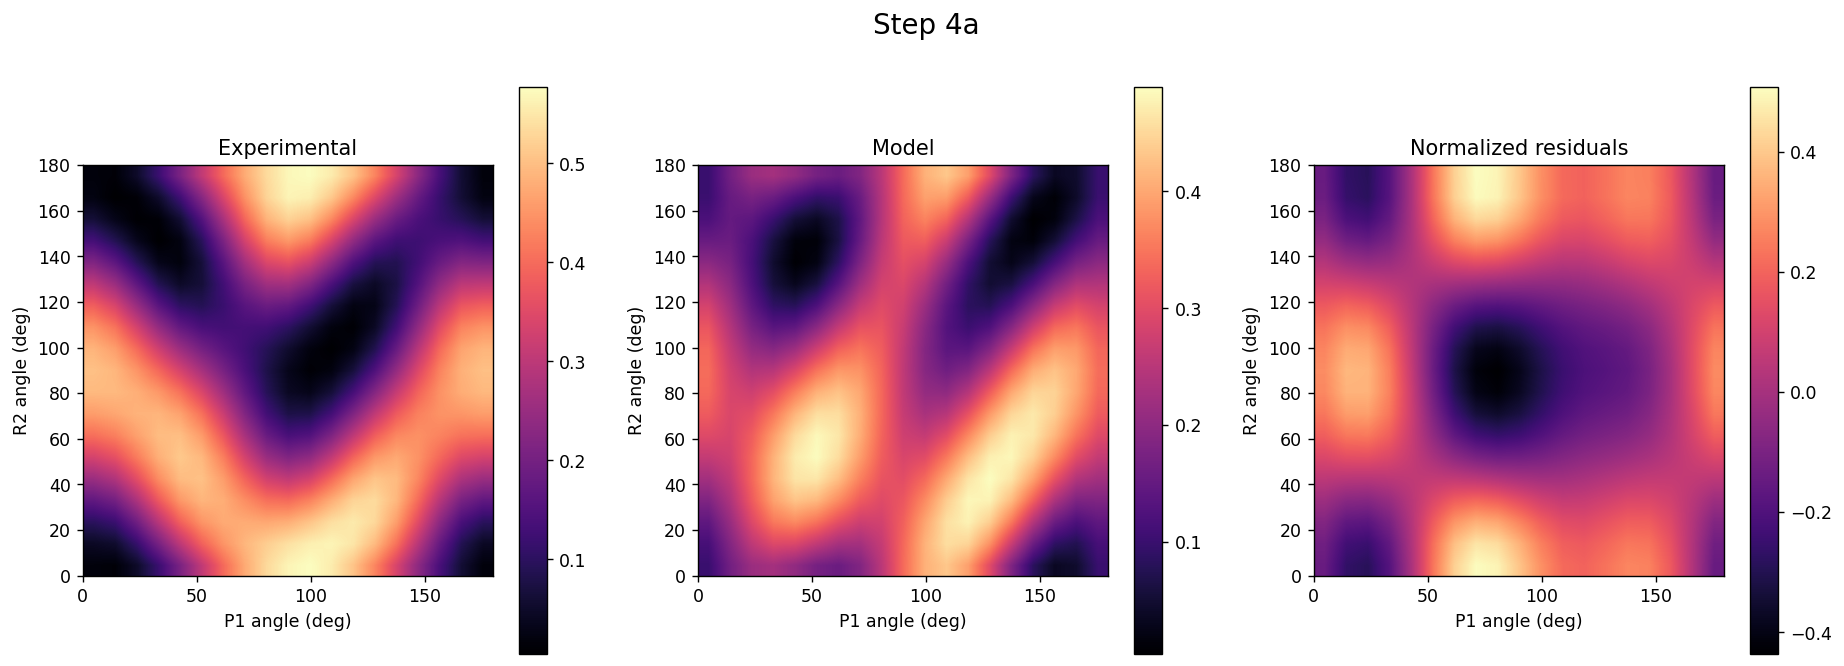

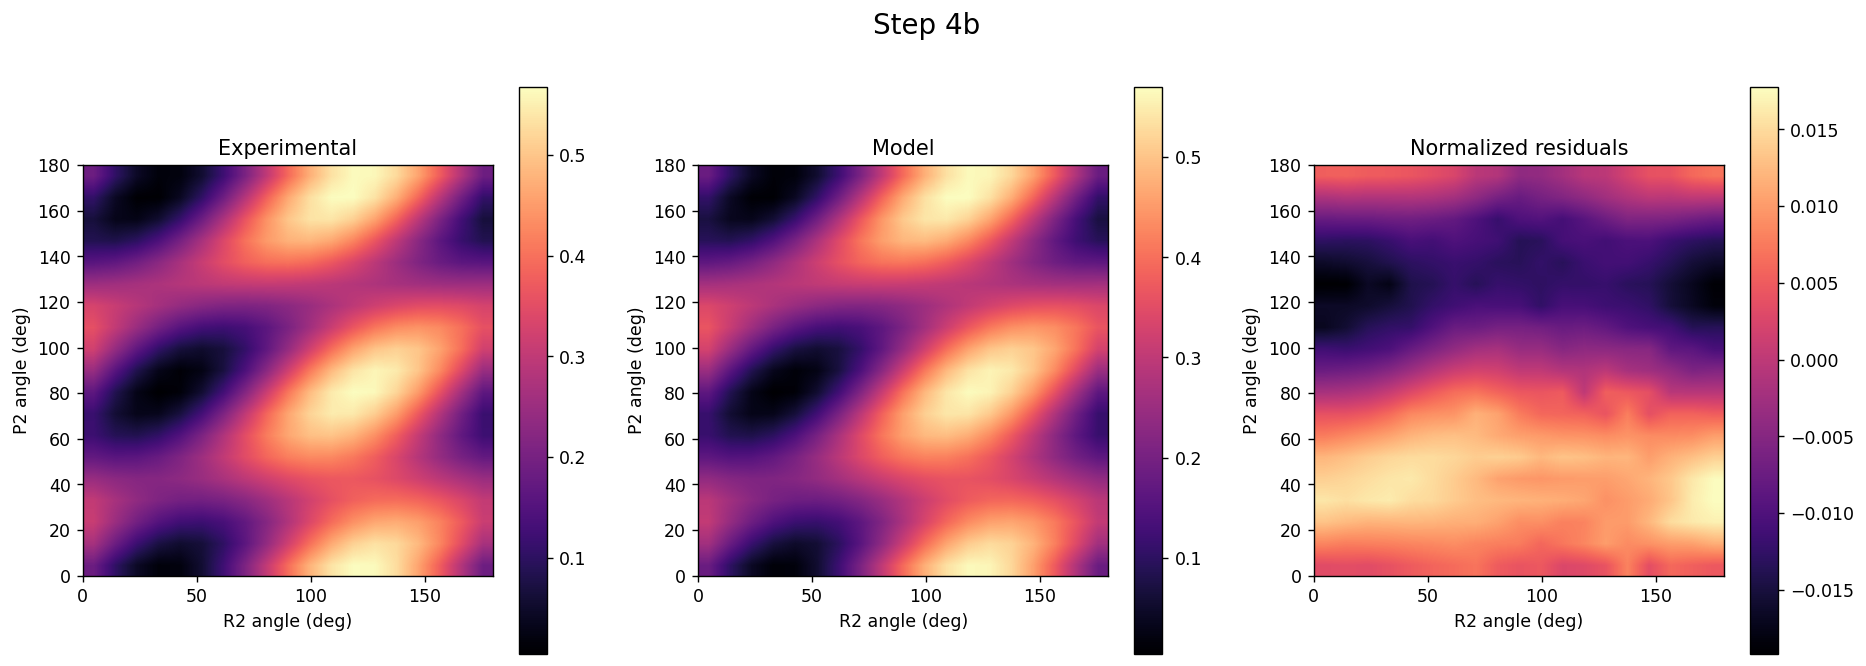

In [87]:
cal_dict = cal.analysis_step_4(cal_dict, verbose=True)

## Step 5: Characterization of R1

Finally we can characterize the last retarder. R1 must be placed at Motor 1. As we have a characterized Stokes polarimeter after it, we can easily characterize it. However, we place it with a random angle. If that angle is very similar to the angle of P1 (or close to 90º), the resulting state will be almost linear and the error in the determination of R1 parameters will be high. For that reason, we will perform two measurements, rotating P1 45º for the second measurement. In this way, we assure the error may not be too high.

### Step 5a: P1 at random

First measurement.

In [88]:
cal_dict = cal.make_step_5(cal_dict, pol, substep="a")


Completion:   0   0   0   0   1   1   1   1   2   2   2   3   3   3   3   4   4   4   4   5   5   5   6   6   6   6   7   7   7   8   8   8   8   9   9   9   9  10  10  10  11  11  11  11  12  12  12  13  13  13  13  14  14  14  14  15  15  15  16  16  16  16  17  17  17  18  18  18  18  19  19  19  19  20  20  20  21  21  21  21  22  22  22  22  23  23  23  24  24  24  24  25  25  25  26  26  26  26  27  27  27  27  28  28  28  29  29  29  29  30  30  30  31  31  31  31  32  32  32  32  33  33  33  34  34  34  34  35  35  35  36  36  36  36  37  37  37  37  38  38  38  39  39  39  39  40  40  40  40  41  41  41  42  42  42  42  43  43  43  44  44  44  44  45  45  45  45  46  46  46  47  47  47  47  48  48  48  49  49  49  49  50  50  50  50  51  51  51  52  52  52  52  53  53  53  54  54  54  54  55  55  55  55  56  56  56  57  57  57  57  58  58  58  59  59  59  59  60  60  60  60  61  61  61  62  62  62  62  63  63  63  63  64  64  64  65  65  65  65  66  66  66  67  67  67  67  68

### Step 5b: P1 at random + 45º

Second measurement.

In [89]:
cal_dict = cal.make_step_5(cal_dict, pol, substep="b")


Completion:   0   0   0   0   1   1   1   1   2   2   2   3   3   3   3   4   4   4   4   5   5   5   6   6   6   6   7   7   7   8   8   8   8   9   9   9   9  10  10  10  11  11  11  11  12  12  12  13  13  13  13  14  14  14  14  15  15  15  16  16  16  16  17  17  17  18  18  18  18  19  19  19  19  20  20  20  21  21  21  21  22  22  22  22  23  23  23  24  24  24  24  25  25  25  26  26  26  26  27  27  27  27  28  28  28  29  29  29  29  30  30  30  31  31  31  31  32  32  32  32  33  33  33  34  34  34  34  35  35  35  36  36  36  36  37  37  37  37  38  38  38  39  39  39  39  40  40  40  40  41  41  41  42  42  42  42  43  43  43  44  44  44  44  45  45  45  45  46  46  46  47  47  47  47  48  48  48  49  49  49  49  50  50  50  50  51  51  51  52  52  52  52  53  53  53  54  54  54  54  55  55  55  55  56  56  56  57  57  57  57  58  58  58  59  59  59  59  60  60  60  60  61  61  61  62  62  62  62  63  63  63  63  64  64  64  65  65  65  65  66  66  66  67  67  67  67  68

#### Analysis of Step 5

Analyze the data.

2022-02-15 17:05:57,357 - pyswarms.single.global_best - INFO - Optimize for 150 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|█████████████████████████████████████████████████████████████|150/150, best_cost=4.43
2022-02-15 17:07:07,475 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.426151426666958, best pos: [0.93837931 0.92562722 3.14145236 1.90202605]


The normalized MSE is: 1.50 %
The normalized MSE is: 1.72 %
Preliminarr analysis first iteration:
   - R1 p1               : 1.0
   - R1 p2               : 0.9
   - R1 retardance       : 180.0 deg
   - R1 azimuth          : 110.7 deg
   - Max Intensity (0º)  : 0.557 a.u.
   - Max Intensity (45º) : 0.504 a.u.


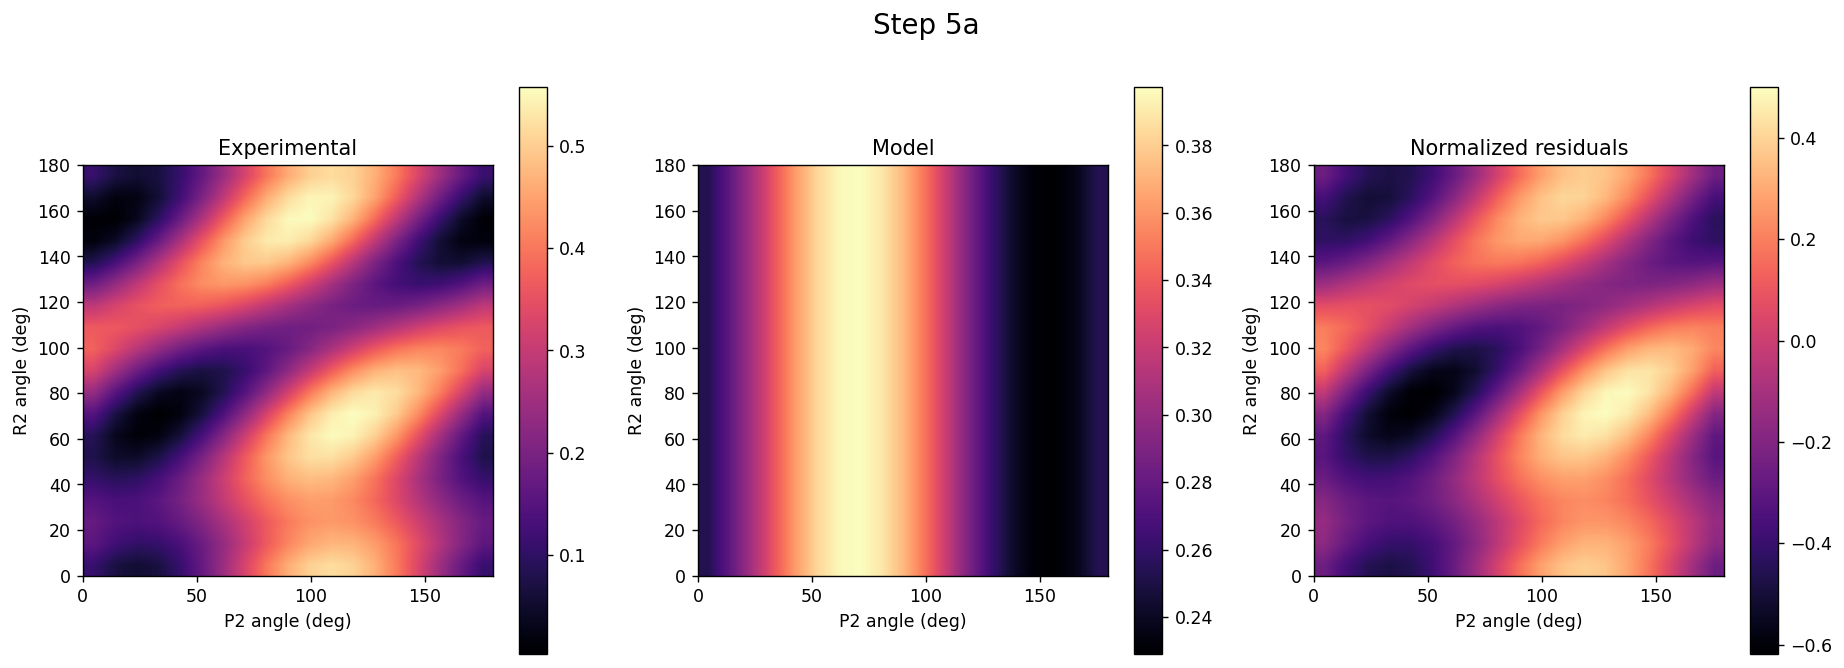

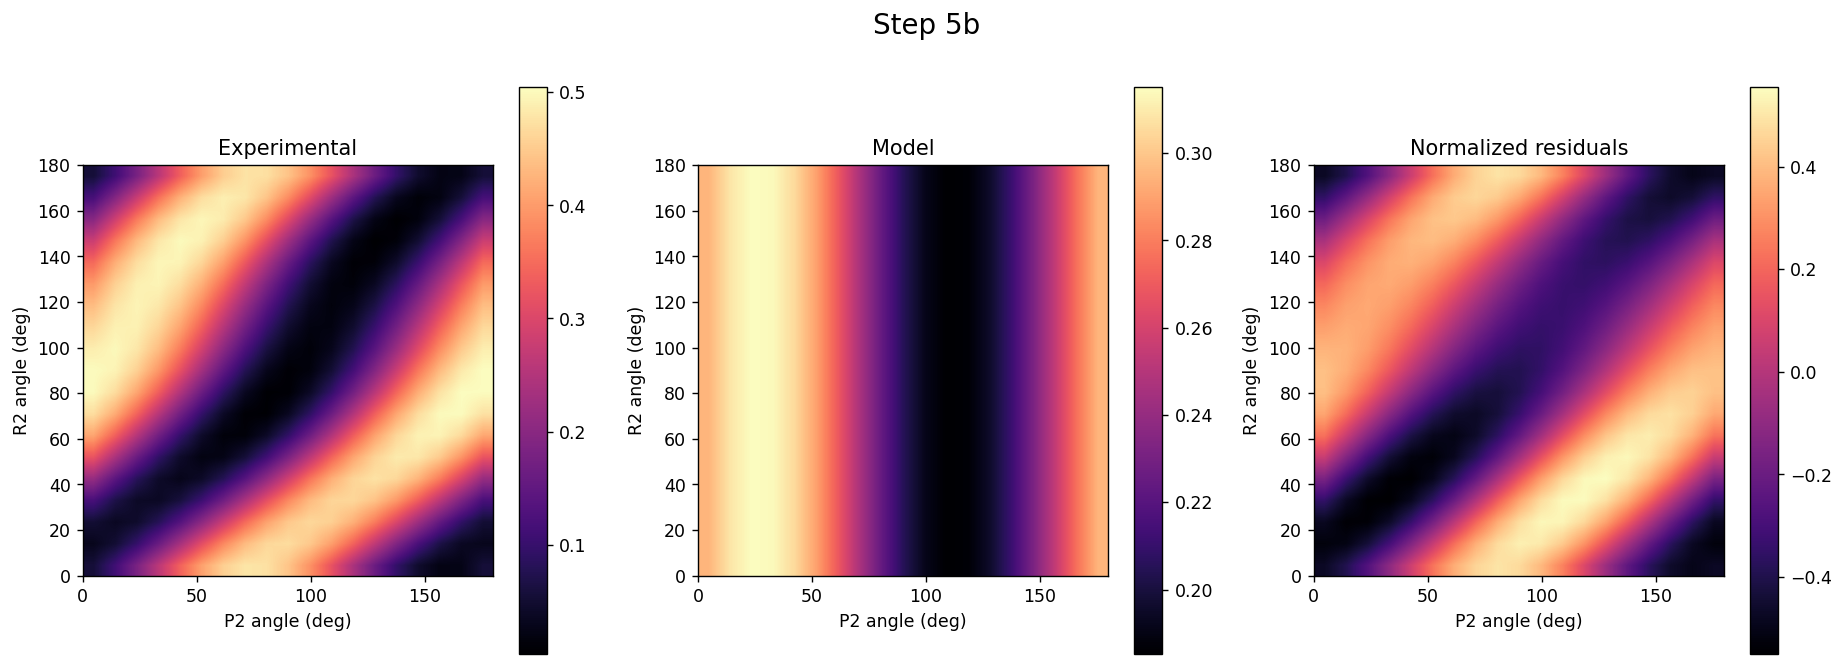

In [90]:
cal_dict = cal.analysis_step_5(cal_dict, verbose=True)

## Step 6: Mueller matrix of air

Now, we have a working polarimeter. We will use air as the test of the goodness of the calibration. There are two ways of calculating that error:

1. *Intensity error*: We calculate the difference between experimental and calculated intensity.
1. *Mueller matrix error*: We calculate the Mueller matrix from measurements and compare it with diag([1, 1, 1, 1]) (TODO).


Completion:   0   0   1   1   2   2   3   3   4   4   5   5   6   6   7   7   8   8   9   9  10  10  11  11  12  12  13  13  14  14  15  15  16  16  17  17  18  18  19  19  20  20  21  21  22  22  23  23  24  24  25  25  26  26  27  27  28  28  28  29  30  30  31  31  32  32  33  33  34  34  35  35  36  36  37  37  38  38  39  39  40  40  41  41  42  42  43  43  44  44  45  45  46  46  47  47  48  48  49  49  50  50  51  51  52  52  53  53  54  54  55  55  56  56  56  57  57  58  59  59  60  60  61  61  62  62  63  63  64  64  65  65  66  66  67  67  68  68  69  69  70  70  71  71  72  72  73  73  74  74  75  75  76  76  77  77  78  78  79  79  80  80  81  81  82  82  83  83  84  84  85  85  86  86  87  87  88  88  89  89  90  90  91  91  92  92  93  93  94  94  95  95  96  96  97  97  98  98  99  99 100 %


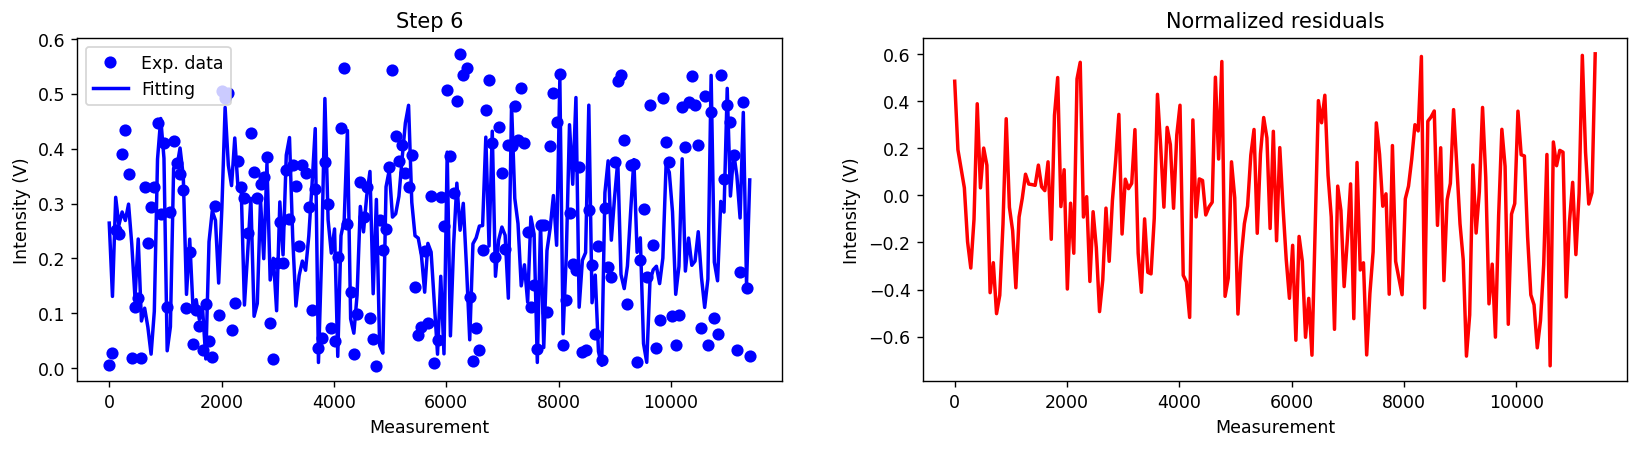

The normalized MSE is: 2.15 %.

Preliminarr analysis first iteration:
   - Error          : 0.0
   - Max Intensity  : 0.573 a.u.


In [92]:
cal_dict = cal.make_step_6(cal_dict, pol, method="intensity", verbose=True)
# cal_dict = cal.make_step_6(cal_dict, pol, method="mueller", verbose=True) # TODO

### Save file with all the data

Now we will save a file with all the data together, just as a safety, as it will be redundant.

In [93]:
np.savez('Calibration_measurements.npz', **cal_dict, **CONF_DT_50, **CONF_U6)

# Stage 2: Data fit

Now we fit all the experiments performed in the previous steps. Thera are two possibilities:

1. Iterative procedure: The data are fitted iteratively. The values obtained in each iteration are used as initial values for the following ones.
2. Simultaneous procedure: Much better and slower. It fits all data simustaneously. A global minimum must be found. (TODO).

In [99]:
# Single calibration, iterative
N = 15
cal_dict = Process_Single_Calibration(cal_dict=None, folder=None, filename="2022-02-01", 
                    method="iterative", type_error="intensity", N_iterations=N, save_name=None, verbose=True)

Iteracion 0
Angle error amplitude for current iteration = 90.0


TypeError: error_step_2a() takes exactly 7 arguments (11 given)

## Final

Ahora vamos a copiar el script utilizado para realizar el ajuste, y este notebook. IMPORTANTE: Comprueba los nombres de archivo y localizaciones, no pueden guardarse en variables y hay que cambiarlo manualmente ahora. 

In [100]:
# Recordar fecha para nombre de archivos
fecha = datetime.date.today()
print(fecha)

NameError: name 'datetime' is not defined

In [1]:
# Cerrar objetos
pol.Close()

NameError: name 'pol' is not defined

Finalmente, cerrar los motores.

## Auxiliar

### Salvar el diccionario de calibración

A veces, puede ser necesario salvar temporalmente el diccionario de calibración.

In [63]:
np.savez("Cal_dict_temp.npz", **cal_dict)

In [7]:
cal_dict = dict(np.load("Cal_dict_temp.npz"))

In [8]:
for item in cal_dict:
    print(item)

type
N_measures_1D
N_measures_2D
N_measures_pol
max_angle_1D
max_angle_2D
step_5a
step_5b
NmaxIt
illum_pol_degree
illum_az
illum_el
illum_el_max
P1_p1
P1_p2
P1_az
P1_az_temp
P1_az_step_4a
P1_R
P2_p1
P2_p2
P2_az
P3_p1
P3_p2
P3_az
Pc_p1
Pc_p2
R1_p1
R1_p2
R1_az
R1_az_temp
R1_R
R2_p1
R2_p2
R2_az
R2_R
Rc_p1
Rc_p2
Rc_R
Rc_offset
Rc_offset_max
angles_1
angles_2X
angles_2Y
S0
S0_error
I_step_1
Angles_step_1
illum_degree_pol
I_step_2a
Angles_step_2a
I_step_2b
Angles_step_2b
I_step_3a
Angles_step_3a
I_step_3b
Angles_step_3b
I_step_3c
Angles_step_3c
I_step_4a
Angles_step_4a
I_step_4b
Angles_1_step_4b
Angles_2_step_4b


In [19]:
cal_dict["testeando"] = True

In [18]:
pol.motor.Move_Absolute([500, 500, 500, 500])

array([500.008, 500.008, 500.008, 500.008])

In [23]:
pol.motor.Is_Moving(verbose=True)

AttributeError: 'NoneType' object has no attribute 'values'